In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# https://pyproj4.github.io/pyproj/dev/api/crs/crs.html
from pyproj.crs import CRS

In [2]:
states = gpd.read_file('tl_2022_us_state/tl_2022_us_state.shp')
power_plants = pd.read_csv('Power_Plants.csv')

In [3]:
states.columns = states.columns.str.lower()
power_plants.columns = power_plants.columns.str.lower()

In [4]:
power_plants = gpd.GeoDataFrame(power_plants,
                    geometry=gpd.points_from_xy(power_plants.longitude, 
                                             power_plants.latitude),
                    crs='EPSG:4326'
                    )

<AxesSubplot:>

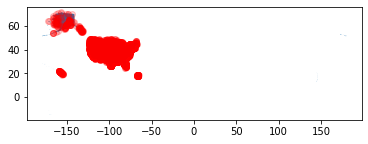

In [5]:
fig, ax = plt.subplots()
states.plot(ax=ax)
power_plants.plot(ax=ax, color='red', alpha=0.2)

In [6]:
states.dtypes

region        object
division      object
statefp       object
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [7]:
states.region = states.region.astype('int')
states.division = states.division.astype('int')
states.statefp = states.statefp.astype('int')
states.dtypes

region         int64
division       int64
statefp        int64
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [8]:
states[states.region==9]

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
34,9,0,78,01802710,78,VI,United States Virgin Islands,00,G4000,A,348021909,1550236187,+18.3392359,-064.9500433,"MULTIPOLYGON (((-64.76834 18.26033, -64.77074 ..."
35,9,0,69,01779809,69,MP,Commonwealth of the Northern Mariana Islands,00,G4000,A,472292521,4644252458,+15.0010865,+145.6181702,"MULTIPOLYGON (((145.05897 14.12500, 145.06302 ..."
36,9,0,66,01802705,66,GU,Guam,00,G4000,A,543555849,934337453,+13.4417451,+144.7719021,"POLYGON ((144.56343 13.44806, 144.56357 13.450..."
41,9,0,60,01802701,60,AS,American Samoa,00,G4000,A,197759069,1307243751,-14.2671590,-170.6682674,"MULTIPOLYGON (((-170.53809 -14.33613, -170.548..."
49,9,0,72,01779808,72,PR,Puerto Rico,00,G4000,A,8869029522,4922249087,+18.2176480,-066.4107992,"MULTIPOLYGON (((-66.32322 17.87767, -66.33170 ..."


<AxesSubplot:>

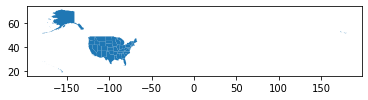

In [9]:
are_states = states[states.region.isin(range(1,5))]
are_states.region.unique()
are_states.plot()

<AxesSubplot:>

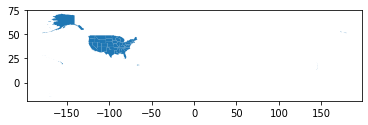

In [10]:
states.plot()

<AxesSubplot:>

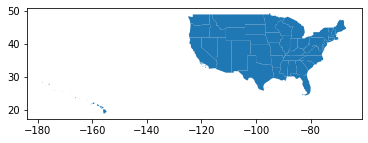

In [12]:
states[(states.statefp!=2) & (states.region!=9)].plot()